# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Seaborn packgae에서 제공하는 titianic 데이터셋 가져오기
import seaborn as sns

In [89]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선 있는 산점도

In [90]:
import matplotlib.pylab as plt

In [91]:
sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks

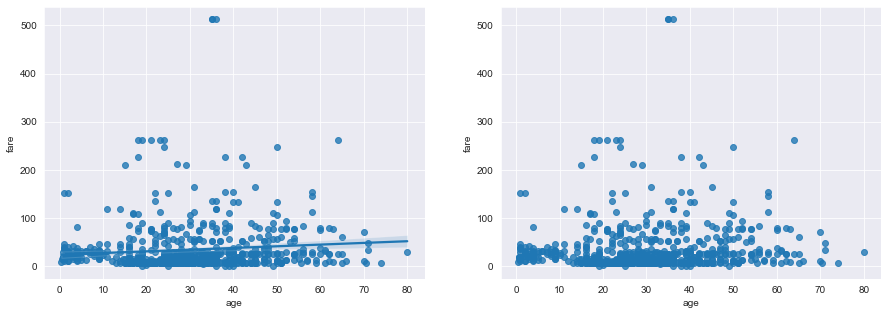

In [92]:
fig = plt.figure(figsize=(15, 5))
ax1 =fig.add_subplot(1, 2, 1)
ax2 =fig.add_subplot(1, 2, 2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax1
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax2,
    fit_reg=False
)
plt.show()

---
### 히스토그램 / 커널밀도그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

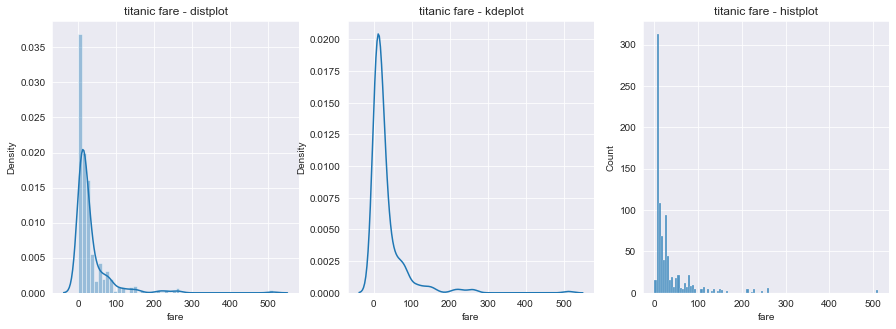

In [93]:
fig = plt.figure(figsize=(15 , 5))
ax1 = fig.add_subplot (1,3,1)
ax2 = fig.add_subplot (1,3,2)
ax3 = fig.add_subplot (1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'], ax = ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'], ax = ax2)

# 히스토그램
sns.histplot(titanic['fare'], ax =ax3)
# sns.histplot(x='fare', data=titanic, ax =ax3) 이것도 가능

# 차트 제목
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중 되어 있다.

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류

In [94]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size') # size는 갯수
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


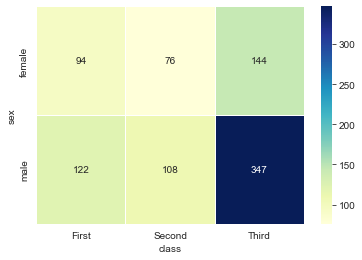

In [95]:
sns.heatmap(
    table,
    annot = True, # 데이터내에 숫자 보여주기
    fmt = 'd', # 'd'는 정수, 'f'는 지수
    linewidths = 0.5, # 각 데이터들의 간격 
    cmap = 'YlGnBu', # yellow,green,blue의 의미 그외에는 따로 찾아보기
    cbar = True
)

plt.show()

### 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

In [96]:
sns.set_style('whitegrid')

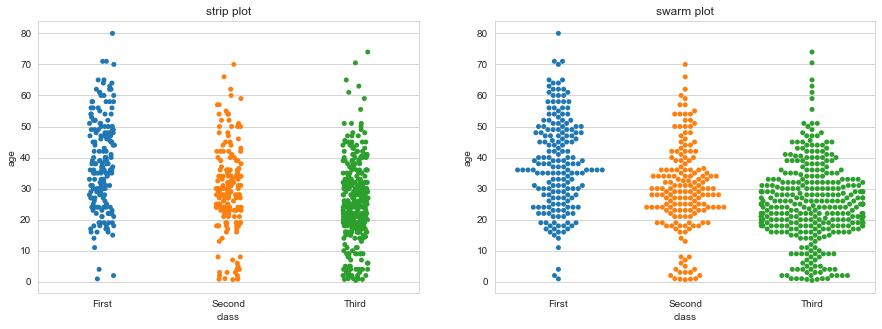

In [97]:
fig =plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax1
)

sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax2
)

# 차트 제목
ax1.set_title('strip plot')
ax2.set_title('swarm plot')


plt.show()

- strip plot 는 중복된 값을 알 수 없다.
- swarm plot 은 중복된 값을 알 수 있다!

---
### 막대 그래프

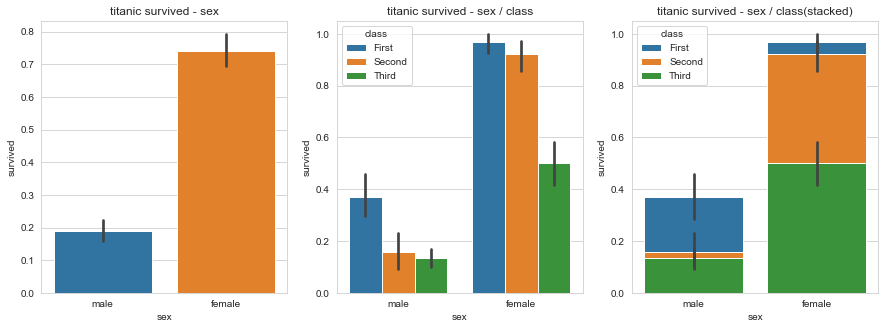

In [98]:
fig = plt.figure(figsize = (15 ,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x ='sex',
    y = 'survived',
    data = titanic,
    ax = ax1,
    # ci='sd' # 표준편차 보여주기
)
# x, y, hue
sns.barplot(
    x ='sex',
    y = 'survived',
    hue = 'class',  # 생존 성별 class별로
    data = titanic,
    ax = ax2,
    # ci='sd' # 표준편차 보여주기
)
# x, y, hue 누적 출력
sns.barplot(
    x ='sex',
    y = 'survived',
    hue = 'class',  # 생존 성별 class별로
    dodge = False,
    data = titanic,
    ax = ax3,
    # ci='sd' # 표준편차 보여주기
)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class(stacked)')

plt.show()

오차막대(error bar) : 갈색으로 보이는 bar가 오차구간이며 bar위까지가 오차 범위이다.
> 'titanic survived - sex'의 male은 0.9이며 표준편차가 보인다. female은 0.73이며 표준편차가 보인다.

---
### 빈도 그래프

In [99]:
sns.set_style('whitegrid')

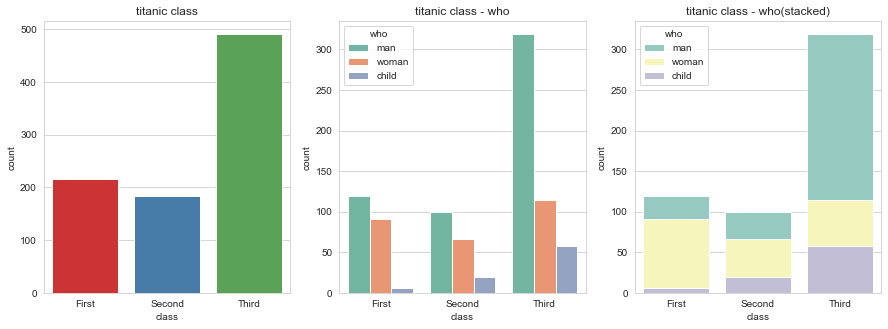

In [100]:
fig = plt.figure(figsize=(15 , 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(
    x ='class',
    data =titanic,
    palette='Set1',
    ax =ax1
)

# hue
sns.countplot(
    x ='class',
    hue='who',
    data =titanic,
    palette='Set2',
    ax =ax2
)

# stack
sns.countplot(
    x ='class',
    hue='who',
    data =titanic,
    palette='Set3',
    dodge=False,
    ax =ax3
)
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

In [101]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프가 추가

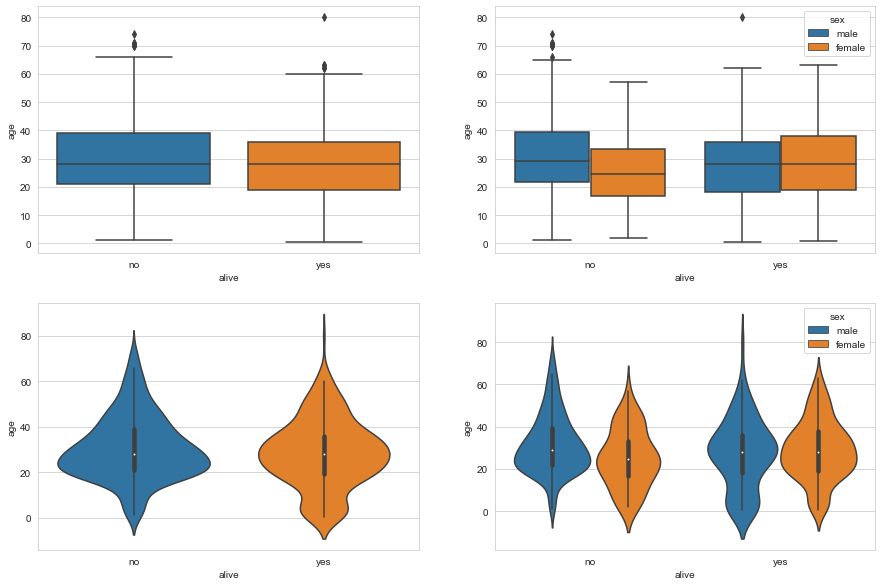

In [102]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# boxplot : 기본값
sns.boxplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax =ax1
)

# boxplot : 기본값 - hue
sns.boxplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax =ax2
)

# violinplot : 기본값 - hue
sns.violinplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax =ax3
)

# violinplot : 기본값 - hue
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax =ax4
)
plt.show()

In [103]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- violinplot 밀도를 확인 할 수 있다.

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

Text(0.5, 0.98, 'titanic fare - kde')

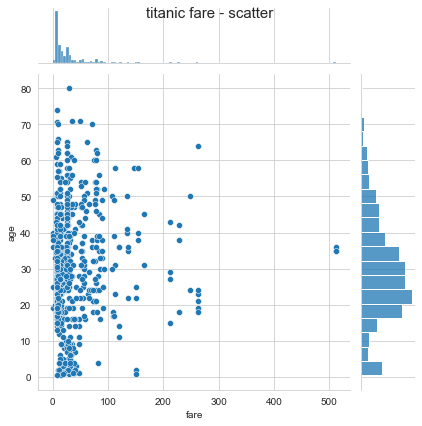

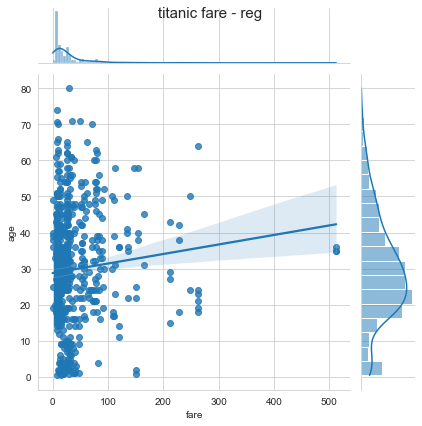

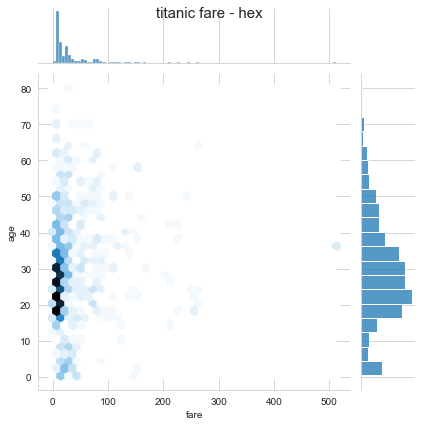

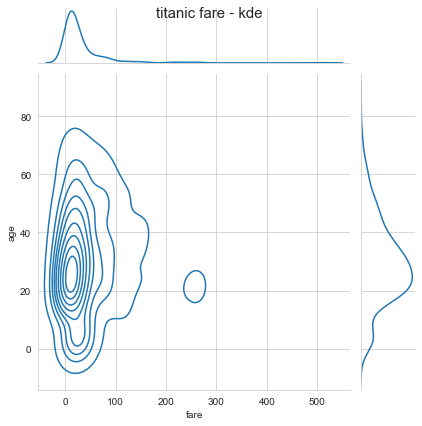

In [107]:
# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
    x = 'fare',
    y = 'age',
    data = titanic
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind= 'reg',
    data = titanic
)

# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind= 'hex',
    data = titanic
)

# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind= 'kde',
    data = titanic
)

j1.fig.suptitle('titanic fare - scatter', size =15)
j2.fig.suptitle('titanic fare - reg', size =15)
j3.fig.suptitle('titanic fare - hex', size =15)
j4.fig.suptitle('titanic fare - kde', size =15)

---
### 조건을 적용하여 화면을 그리드로 분할하기

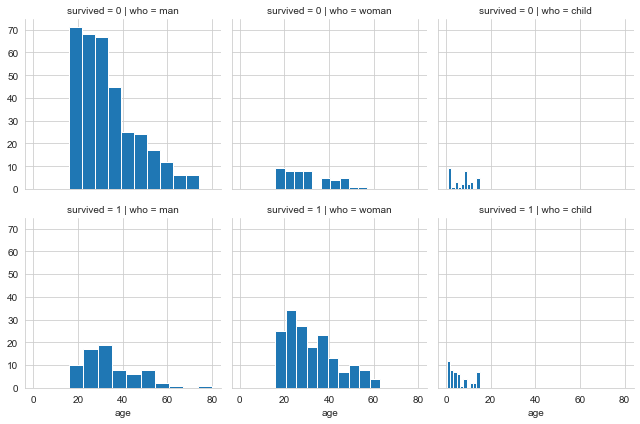

In [ ]:
# 조건에 따라 Grid 나누기
g =sns.FacetGrid(
    data=titanic,
    col ='who',
    row = 'survived'
)
g = g.map(plt.hist, 'age') # y축의 age가 된다.

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

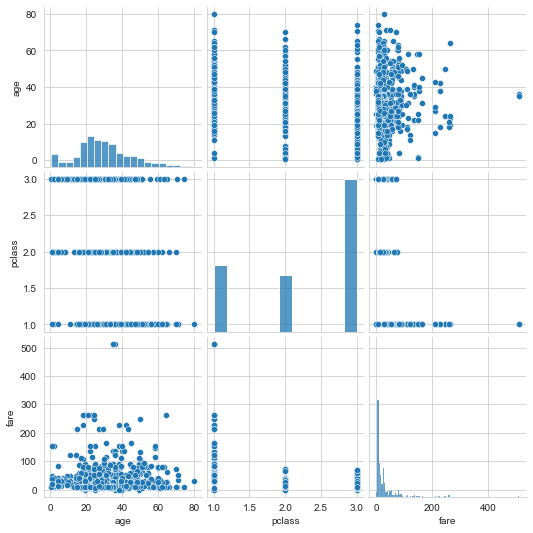

In [ ]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리도 나누기
sns.pairplot(titanic_pair)

plt.show()